### Standard PID controller



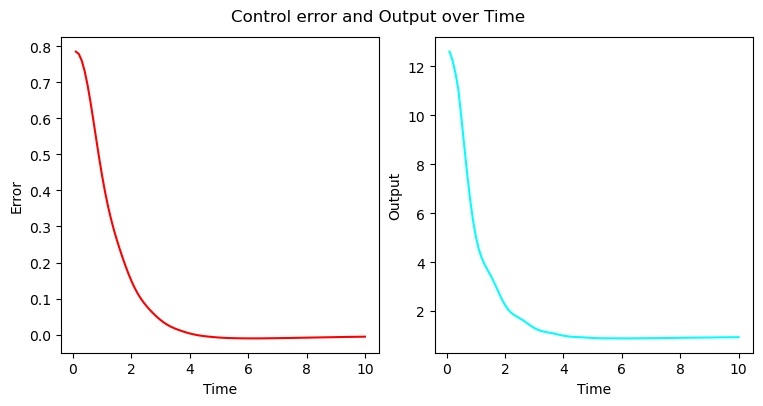

In [7]:
import numpy as np
from control.pid import PIDController
from control.systems import InvertedPendulumSystem
from control.controlutils import plot_error

pend_system = InvertedPendulumSystem()
controller = PIDController(15.94104423478139, 1.0806148906694266, 5.159623499281683)

ticks: int = 100
delta_time: float = 0.1

time_points = np.full(ticks, delta_time).cumsum()
error_values = np.empty(ticks)
output_values = np.empty(ticks)

for tick in range(ticks):
    input = pend_system.get_control_input()
    setpoint = pend_system.get_setpoint()
    output = controller.control_output(input, setpoint, delta_time, abs_tol=None)
    pend_system.set_control_output(output, delta_time)
    error_values[tick] = controller.latest_error
    output_values[tick] = output
controller.reset()

plot_error(time_points, error_values, output_values)


### PID system controller

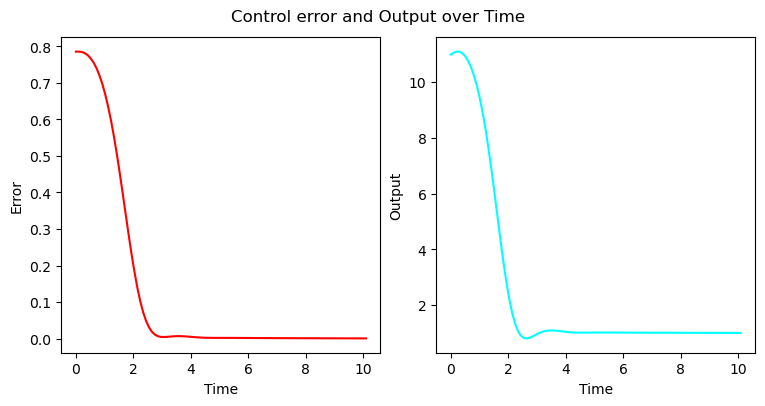

In [8]:
import numpy as np
import time
from control.pid import PIDController
from control.systems import InvertedPendulumSystem
from control.controlutils import plot_error
from control.controllers import SystemController

pend_system = InvertedPendulumSystem()
controller = PIDController(14.0, 0.80, 2.5)
system_controller = SystemController(controller, pend_system)

ticks: int = 100
delta_time: float = 0.1
time_factor: float = 10.0

time_points = np.zeros(ticks)
error_values = np.empty(ticks)
output_values = np.empty(ticks)

for tick in range(ticks):
    _, error, output, actual_delta_time = system_controller.tick(time_factor)
    
    time_points[tick] = time_points[tick - 1] + actual_delta_time
    error_values[tick] = error
    output_values[tick] = output
    time.sleep(delta_time / time_factor)
controller.reset()

plot_error(time_points, error_values, output_values)


### PID automatic system controller

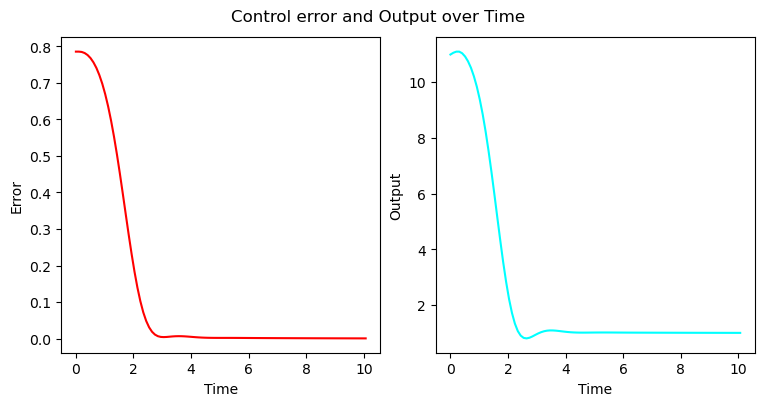

In [9]:
import numpy as np
import time
from control.pid import PIDController
from control.systems import InvertedPendulumSystem
from control.controlutils import plot_error
from control.controllers import SystemController, AutoSystemController

pend_system = InvertedPendulumSystem()
controller = PIDController(14.0, 0.80, 2.5)
system_controller = SystemController(controller, pend_system)
auto_controller = AutoSystemController(system_controller)

ticks: int = 100
delta_time: float = 0.1
time_factor: float = 10.0

time_points = []
error_values = []
output_values = []

def update(i, e, o, dt, tt):
    global time_points, error_values, output_values
    time_points.append(tt)
    error_values.append(e)
    output_values.append(o)

with auto_controller.context_run(tick_rate=(1.0 / delta_time), time_factor=time_factor, data_callback=update, reset=True):
    for _ in range(ticks):
        time.sleep((delta_time / time_factor))

plot_error(time_points, error_values, output_values)
